In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Read the dataset
data = pd.read_csv("/content/drive/MyDrive/data mining project/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Get dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Quick look at the columns and a few sample rows
print("Dataset Columns:", data.columns.tolist())
data.sample(5)


Dataset Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4366,0537-QYZZN,Male,1,Yes,Yes,24,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.85,1857.75,No
4475,4693-VWVBO,Female,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.55,61.05,No
5635,2087-QAREY,Female,0,Yes,No,22,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,54.70,1178.75,No
6144,2322-VCZHZ,Male,1,Yes,No,23,Yes,No,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.00,2024.1,No
4250,0565-JUPYD,Male,0,No,No,63,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,No,Credit card (automatic),104.50,6590.8,No


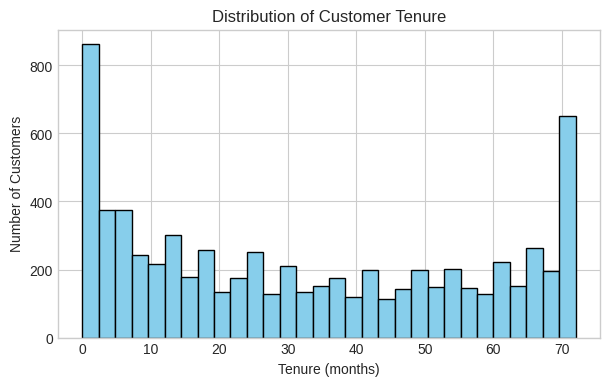

In [ ]:
# Example: Histogram of tenure (months with the company)
plt.figure(figsize=(7,4))
plt.hist(data['tenure'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()


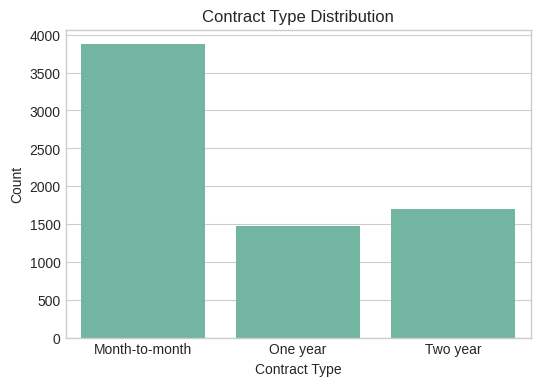

In [ ]:
# Example: Bar plot for Contract types
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', data=data)
plt.title("Contract Type Distribution")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()



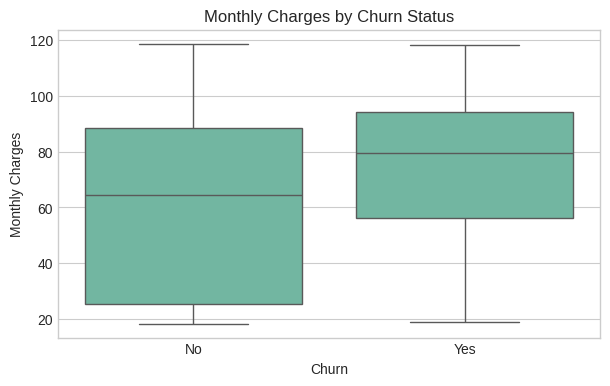

In [ ]:
# Boxplot for Monthly Charges
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


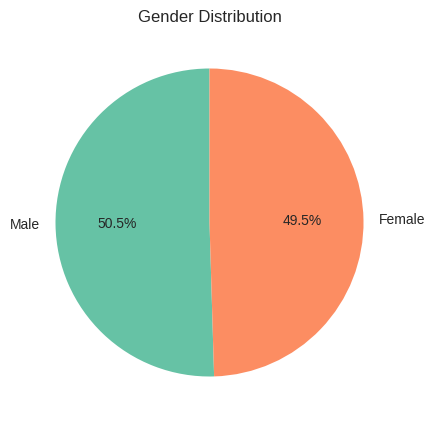

In [ ]:
# Pie chart for gender distribution
plt.figure(figsize=(5,5))
data['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


In [ ]:
# Value ranges and basic stats
data.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Skewness of numerical features
data.skew(numeric_only=True)


,0
SeniorCitizen,1.833633
tenure,0.239540
MonthlyCharges,-0.220524


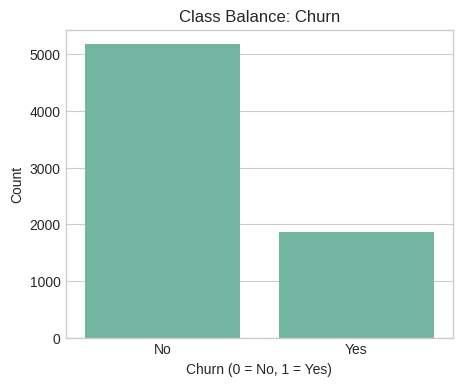

In [ ]:
# Class balance (Churn)
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=data)
plt.title("Class Balance: Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


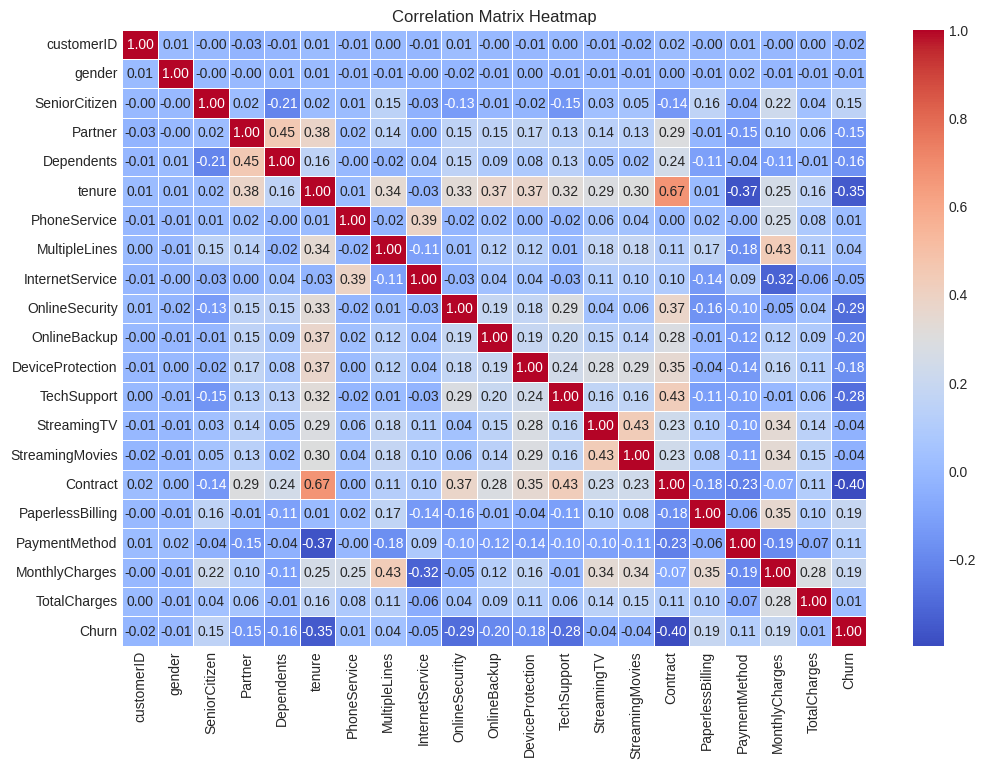

In [ ]:
# Encode categorical variables for correlation (if needed)
data_corr = data.copy()
for col in data_corr.select_dtypes('object').columns:
    data_corr[col] = data_corr[col].astype('category').cat.codes

# Correlation matrix with annotated values
plt.figure(figsize=(12,8))
corr = data_corr.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
import os

OUT_DIR = "./lab03_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

TARGET_COL = "Churn"

# Quick sanity check
assert TARGET_COL in data.columns, f"'{TARGET_COL}' not found. Available columns: {list(data.columns)}"
print("Setup OK ->", {"rows": len(data), "cols": data.shape[1], "target": TARGET_COL, "out_dir": OUT_DIR})


Setup OK -> {'rows': 7043, 'cols': 21, 'target': 'Churn', 'out_dir': './lab03_outputs'}


In [ ]:
df_raw = data.copy()
df = df_raw.copy()

print("Shape:", df.shape)
print("\nDtypes:")
print(df.dtypes.head(20))
display(df.head())

Shape: (7043, 21)

Dtypes:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Convert pure blanks to NaN (important for columns like 'TotalCharges')
df = df.replace(r"^\s*$", np.nan, regex=True)

# Telco-specific: 'TotalCharges' often has blanks for new customers; coerce to numeric to surface NaNs
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Missing value report BEFORE any imputation
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
mv_report = pd.concat([missing_counts, missing_pct], axis=1)
mv_report.columns = ["MissingCount", "MissingPercent"]

print("\n=== Missing Value Report (before cleaning) ===")
display(mv_report[mv_report["MissingCount"] > 0])

# Save a clear, labeled image for the report (only preprocessing visualization)
plt.figure()
mv_report[mv_report["MissingCount"] > 0]["MissingCount"].plot(kind="bar")
plt.title("Missing Values per Column (Before Cleaning)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "missing_values_before.png"), dpi=150)
plt.close()

# Also save CSV for appendix
mv_report.to_csv(os.path.join(OUT_DIR, "missing_value_report_before.csv"), index=True)



=== Missing Value Report (before cleaning) ===


,MissingCount,MissingPercent
TotalCharges,11,0.156183


In [ ]:
# Drop identifier-like columns to avoid leakage in later stages (still preprocessing)
id_like = [c for c in df.columns if c.lower() in ["customerid", "id", "index"]]
df = df.drop(columns=id_like, errors="ignore")

# Prepare target as 0/1 (Yes->1, No->0); keep features separate
assert TARGET_COL in df.columns, f"{TARGET_COL} not found in data."
y = df[TARGET_COL].map({"Yes": 1, "No": 0}) if df[TARGET_COL].dtype == "object" else df[TARGET_COL]
X = df.drop(columns=[TARGET_COL])

print("X shape:", X.shape, "| y shape:", y.shape)


X shape: (7043, 19) | y shape: (7043,)


In [ ]:
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numeric columns ({len(numeric_cols)}):", numeric_cols)
print(f"Categorical columns ({len(categorical_cols)}):", categorical_cols)


Numeric columns (4): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns (15): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print("Train:", X_train.shape, y_train.shape, "| Test:", X_test.shape, y_test.shape)

Train: (5634, 19) (5634,) | Test: (1409, 19) (1409,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Rationale for your report:
# - Numeric: median imputation is robust to outliers; StandardScaler prepares for algorithms that assume standardized inputs.
# - Categorical: most_frequent imputation preserves the mode; OneHotEncoder avoids false ordinality and is safe for unseen categories.

numeric_proc = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())             # keep for normalization requirement
])

# OneHotEncoder API differs by sklearn version; try new arg first, fallback if needed.
try:
    categorical_proc = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ])
except TypeError:
    categorical_proc = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))
    ])

preprocessor = ColumnTransformer([
    ("num", numeric_proc, numeric_cols),
    ("cat", categorical_proc, categorical_cols)
])

In [ ]:
# Fit on training set to avoid leakage
preprocessor.fit(X_train)

# Transform both sets
X_train_proc = preprocessor.transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

# Rebuild feature names after One-Hot for documentation clarity
ohe = preprocessor.named_transformers_["cat"].named_steps["ohe"]
cat_feature_names = ohe.get_feature_names_out(categorical_cols).tolist()
feature_names = numeric_cols + cat_feature_names

# Convert to DataFrames for easy saving or inspection
train_proc_df = pd.DataFrame(X_train_proc, columns=feature_names)
test_proc_df  = pd.DataFrame(X_test_proc,  columns=feature_names)

# Append target for completeness of preprocessed splits (still preprocessing output)
train_proc_df[TARGET_COL] = y_train.to_numpy()
test_proc_df[TARGET_COL]  = y_test.to_numpy()

display(train_proc_df.head())
display(test_proc_df.head())

# Post‑imputation/scaling missing check (should be zero)
print("\nPost‑processing NaNs in X_train:", np.isnan(X_train_proc).sum())
print("Post‑processing NaNs in X_test :", np.isnan(X_test_proc).sum())


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-0.441773,0.102371,-0.521976,-0.263290,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,-0.441773,-0.711743,0.337478,-0.504815,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,-0.441773,-0.793155,-0.809013,-0.751214,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,-0.441773,-0.263980,0.284384,-0.173700,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,-0.441773,-1.281624,-0.676279,-0.990851,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-0.441773,1.608483,1.629976,2.707614,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,2.263606,-0.996684,1.168725,-0.611506,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,-0.441773,0.346606,0.445324,0.399490,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
3,-0.441773,-0.589626,0.440347,-0.365546,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,-0.441773,1.608483,0.588013,1.588523,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0



Post‑processing NaNs in X_train: 0
Post‑processing NaNs in X_test : 0


In [ ]:
train_csv = os.path.join(OUT_DIR, "train_processed.csv")
test_csv  = os.path.join(OUT_DIR, "test_processed.csv")
train_proc_df.to_csv(train_csv, index=False)
test_proc_df.to_csv(test_csv, index=False)
print("Saved:", train_csv)
print("Saved:", test_csv)

# Save the initial missing-value report for appendix/reference
mv_report.to_csv(os.path.join(OUT_DIR, "appendix_missing_value_report_raw.csv"), index=True)
print("Saved:", os.path.join(OUT_DIR, "appendix_missing_value_report_raw.csv"))
print("Saved figure:", os.path.join(OUT_DIR, "missing_values_before.png"))


Saved: ./lab03_outputs/train_processed.csv
Saved: ./lab03_outputs/test_processed.csv
Saved: ./lab03_outputs/appendix_missing_value_report_raw.csv
Saved figure: ./lab03_outputs/missing_values_before.png


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Baseline model with ALL features
clf_base = LogisticRegression(max_iter=2000)
clf_base.fit(X_train_proc, y_train)
y_pred_base = clf_base.predict(X_test_proc)

acc_base = accuracy_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base)

print("Baseline Accuracy:", acc_base)
print("Baseline F1:", f1_base)


Baseline Accuracy: 0.8055358410220014
Baseline F1: 0.6040462427745664


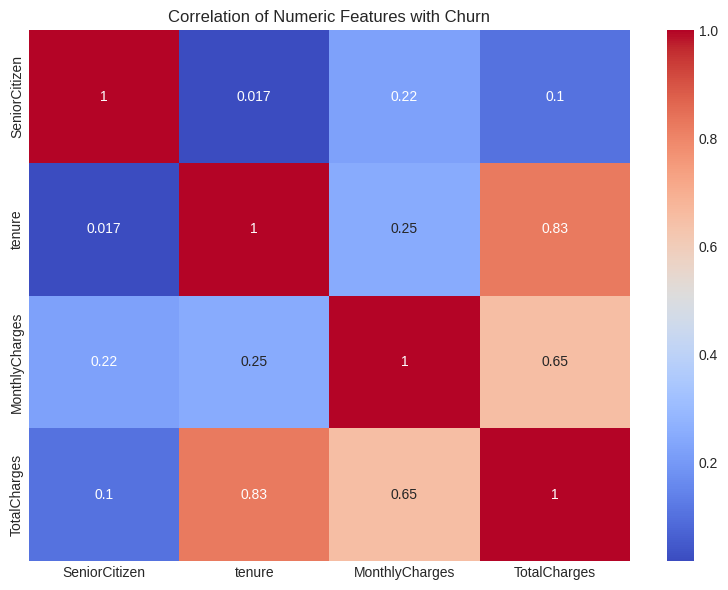

Selected numeric features (correlation filter): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
import seaborn as sns

# Correlation on numeric features only (before encoding)
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Numeric Features with Churn")
plt.tight_layout()
plt.show()

# Example: keep features with |corr| > 0.05
# Note: We are calculating correlation with the target 'Churn' separately since it's not numeric in 'df'
corr_target = df[numeric_cols].corrwith(df[TARGET_COL].map({"Yes": 1, "No": 0}))
selected_corr_feats = corr_target[abs(corr_target) > 0.05].index.tolist()
print("Selected numeric features (correlation filter):", selected_corr_feats)

In [ ]:
from sklearn.feature_selection import RFE

# Use Logistic Regression for RFE
rfe_model = LogisticRegression(max_iter=2000)
selector = RFE(rfe_model, n_features_to_select=15)  # keep top 15
selector = selector.fit(X_train_proc, y_train)

selected_rfe_feats = [f for f, keep in zip(feature_names, selector.support_) if keep]
print("Selected features (RFE):", selected_rfe_feats)


Selected features (RFE): ['tenure', 'MonthlyCharges', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'Contract_Month-to-month', 'Contract_Two year']


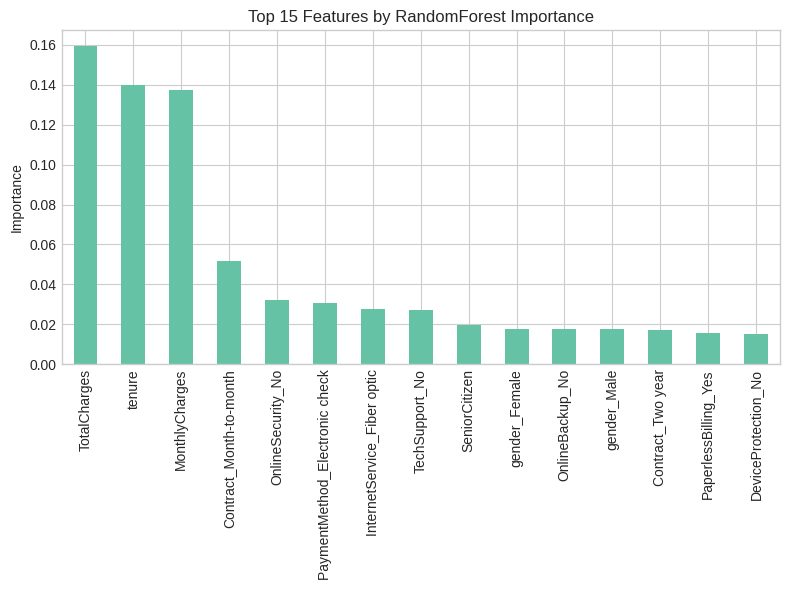

Selected features (RandomForest Importance): ['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Month-to-month', 'OnlineSecurity_No', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'TechSupport_No', 'SeniorCitizen', 'gender_Female', 'OnlineBackup_No', 'gender_Male', 'Contract_Two year', 'PaperlessBilling_Yes', 'DeviceProtection_No']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_proc, y_train)

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
feat_imp.plot(kind="bar")
plt.title("Top 15 Features by RandomForest Importance")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

selected_rf_feats = feat_imp.index.tolist()
print("Selected features (RandomForest Importance):", selected_rf_feats)


In [ ]:
# Example: retrain with RFE features
idx_selected = [i for i, f in enumerate(feature_names) if f in selected_rfe_feats]

X_train_sel = X_train_proc[:, idx_selected]
X_test_sel  = X_test_proc[:, idx_selected]

clf_sel = LogisticRegression(max_iter=2000)
clf_sel.fit(X_train_sel, y_train)
y_pred_sel = clf_sel.predict(X_test_sel)

acc_sel = accuracy_score(y_test, y_pred_sel)
f1_sel  = f1_score(y_test, y_pred_sel)

print("With Selected Features -> Accuracy:", acc_sel, "| F1:", f1_sel)

print("\n=== Comparison ===")
print("Baseline -> Acc:", acc_base, "F1:", f1_base)
print("Selected -> Acc:", acc_sel, "F1:", f1_sel)


With Selected Features -> Accuracy: 0.7806955287437899 | F1: 0.5502183406113537

=== Comparison ===
Baseline -> Acc: 0.8055358410220014 F1: 0.6040462427745664
Selected -> Acc: 0.7806955287437899 F1: 0.5502183406113537


In [ ]:
# Lab 4: Feature Selection + Class Imbalance (uses Lab-3 variables)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Sanity checks (will raise if Lab-3 wasn't run)
assert 'X_train_proc' in globals() and 'X_test_proc' in globals(), "Run Lab-3 preprocessing first."
assert 'y_train' in globals() and 'y_test' in globals(), "Run Lab-3 train/test split first."
assert 'feature_names' in globals(), "feature_names missing (rebuild from Lab-3 preprocessor)."

print("Train X:", X_train_proc.shape, "y:", y_train.shape)
print("Test  X:", X_test_proc.shape,  "y:", y_test.shape)
print("Features:", len(feature_names))


Train X: (5634, 45) y: (5634,)
Test  X: (1409, 45) y: (1409,)
Features: 45


In [ ]:
print("Train:", Counter(y_train))
print("Test :", Counter(y_test))
imbalance_df = pd.DataFrame({
    "Set": ["Train","Test"],
    "Neg (0)": [int(np.sum(y_train==0)), int(np.sum(y_test==0))],
    "Pos (1)": [int(np.sum(y_train==1)), int(np.sum(y_test==1))]
})
imbalance_df["Pos %"] = imbalance_df["Pos (1)"] / (imbalance_df["Neg (0)"] + imbalance_df["Pos (1)"]) * 100
display(imbalance_df)


Train: Counter({0: 4139, 1: 1495})
Test : Counter({0: 1035, 1: 374})


,Set,Neg (0),Pos (1),Pos %
0,Train,4139,1495,26.535321
1,Test,1035,374,26.543648


[LR class_weight=balanced]  Acc: 0.7381  F1: 0.6136


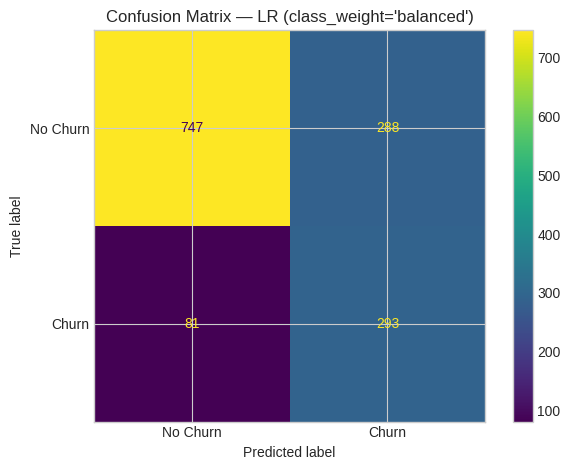

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

lr_w = LogisticRegression(max_iter=3000, class_weight="balanced")
lr_w.fit(X_train_proc, y_train)
y_pred_w = lr_w.predict(X_test_proc)

acc_w = accuracy_score(y_test, y_pred_w)
f1_w  = f1_score(y_test, y_pred_w)
print(f"[LR class_weight=balanced]  Acc: {acc_w:.4f}  F1: {f1_w:.4f}")

cm = confusion_matrix(y_test, y_pred_w, labels=[0,1])
ConfusionMatrixDisplay(cm, display_labels=["No Churn","Churn"]).plot(values_format="d")
plt.title("Confusion Matrix — LR (class_weight='balanced')")
plt.tight_layout(); plt.show()


Before SMOTE: Counter({0: 4139, 1: 1495})
After  SMOTE: Counter({0: 4139, 1: 4139})
[LR + SMOTE (train-only)]  Acc: 0.7374  F1: 0.6162


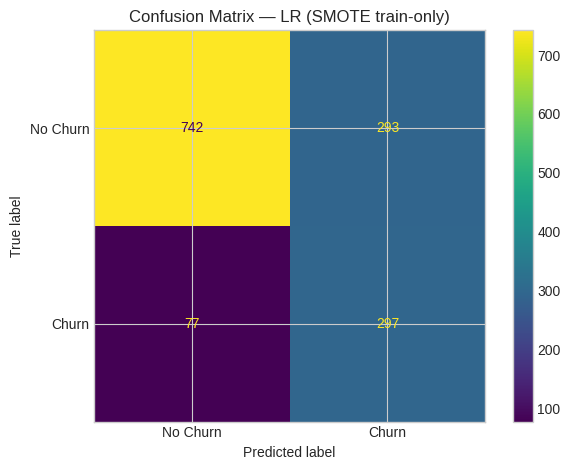

In [ ]:
from imblearn.over_sampling import SMOTE

minority = int(np.sum(y_train==1))
k = max(1, min(5, minority-1))  # safe k for small minority classes

sm = SMOTE(random_state=42, k_neighbors=k)
X_train_sm, y_train_sm = sm.fit_resample(X_train_proc, y_train)

print("Before SMOTE:", Counter(y_train))
print("After  SMOTE:", Counter(y_train_sm))

lr_sm = LogisticRegression(max_iter=3000)  # no class_weight needed after SMOTE
lr_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = lr_sm.predict(X_test_proc)

acc_sm = accuracy_score(y_test, y_pred_sm)
f1_sm  = f1_score(y_test, y_pred_sm)
print(f"[LR + SMOTE (train-only)]  Acc: {acc_sm:.4f}  F1: {f1_sm:.4f}")

cm = confusion_matrix(y_test, y_pred_sm, labels=[0,1])
ConfusionMatrixDisplay(cm, display_labels=["No Churn","Churn"]).plot(values_format="d")
plt.title("Confusion Matrix — LR (SMOTE train-only)")
plt.tight_layout(); plt.show()


[RF class_weight=balanced]  Acc: 0.7814  F1: 0.5361


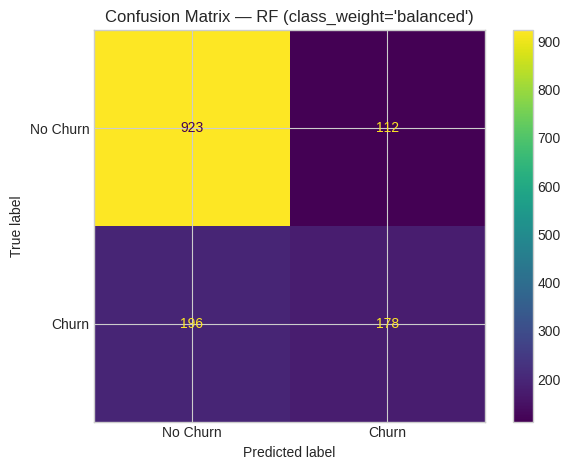

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_w = RandomForestClassifier(n_estimators=600, random_state=42, n_jobs=-1, class_weight="balanced")
rf_w.fit(X_train_proc, y_train)
y_pred_rf = rf_w.predict(X_test_proc)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf  = f1_score(y_test, y_pred_rf)
print(f"[RF class_weight=balanced]  Acc: {acc_rf:.4f}  F1: {f1_rf:.4f}")

cm = confusion_matrix(y_test, y_pred_rf, labels=[0,1])
ConfusionMatrixDisplay(cm, display_labels=["No Churn","Churn"]).plot(values_format="d")
plt.title("Confusion Matrix — RF (class_weight='balanced')")
plt.tight_layout(); plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
proba = lr_sm.predict_proba(X_test_proc)[:,1]  # or lr_w.predict_proba(...)

best = {"thr":0.5,"prec":0,"rec":0,"f1":-1}
for thr in np.linspace(0.2, 0.8, 61):
    y_hat = (proba >= thr).astype(int)
    p,r,f1,_ = precision_recall_fscore_support(y_test, y_hat, average="binary", zero_division=0)
    if f1 > best["f1"]:
        best = {"thr":float(thr),"prec":float(p),"rec":float(r),"f1":float(f1)}

print(f"Best threshold: {best['thr']:.3f}  →  P:{best['prec']:.3f}  R:{best['rec']:.3f}  F1:{best['f1']:.3f}")


Best threshold: 0.520  →  P:0.519  R:0.770  F1:0.620


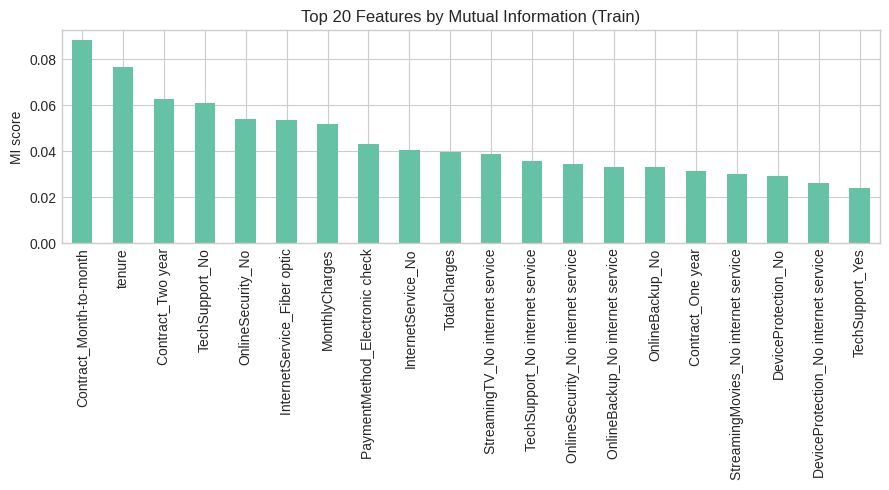

SelectKBest-MI selected 25 features


In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi_scores = mutual_info_classif(X_train_proc, y_train, random_state=42)
mi = pd.Series(mi_scores, index=feature_names).sort_values(ascending=False)

# Visual evidence: Top 20 MI
plt.figure(figsize=(9,5))
mi.head(20).plot(kind="bar")
plt.title("Top 20 Features by Mutual Information (Train)")
plt.ylabel("MI score")
plt.tight_layout(); plt.show()

K = 25  # adjust (e.g., 15/20/30) and report impact
skb = SelectKBest(mutual_info_classif, k=K)
X_train_skb = skb.fit_transform(X_train_proc, y_train)
X_test_skb  = skb.transform(X_test_proc)
selected_skb = [f for f, keep in zip(feature_names, skb.get_support()) if keep]
print(f"SelectKBest-MI selected {len(selected_skb)} features")


In [ ]:
# Logistic Regression (balanced) on selected features
lr_skb = LogisticRegression(max_iter=3000, class_weight="balanced")
lr_skb.fit(X_train_skb, y_train)
y_pred_skb_lr = lr_skb.predict(X_test_skb)
acc_skb_lr = accuracy_score(y_test, y_pred_skb_lr)
f1_skb_lr  = f1_score(y_test, y_pred_skb_lr)
print(f"[LR balanced + SKB(K={K})]  Acc: {acc_skb_lr:.4f}  F1: {f1_skb_lr:.4f}")

# RandomForest (balanced) on selected features
rf_skb = RandomForestClassifier(n_estimators=600, random_state=42, n_jobs=-1, class_weight="balanced")
rf_skb.fit(X_train_skb, y_train)
y_pred_skb_rf = rf_skb.predict(X_test_skb)
acc_skb_rf = accuracy_score(y_test, y_pred_skb_rf)
f1_skb_rf  = f1_score(y_test, y_pred_skb_rf)
print(f"[RF balanced + SKB(K={K})]  Acc: {acc_skb_rf:.4f}  F1: {f1_skb_rf:.4f}")


[LR balanced + SKB(K=25)]  Acc: 0.7353  F1: 0.6182
[RF balanced + SKB(K=25)]  Acc: 0.7757  F1: 0.5198


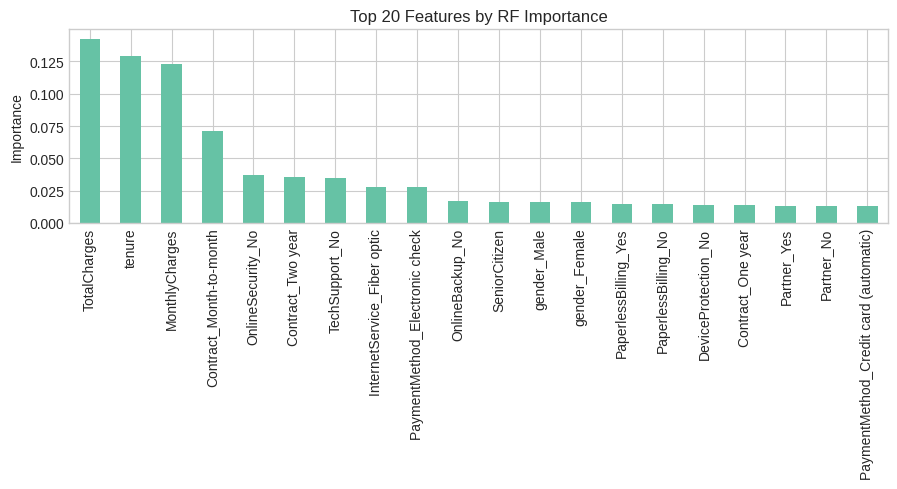

RF-importance selected 33 features


In [ ]:
# Fit RF on full features to compute importances
rf_full = RandomForestClassifier(n_estimators=600, random_state=42, n_jobs=-1, class_weight="balanced")
rf_full.fit(X_train_proc, y_train)
imp = pd.Series(rf_full.feature_importances_, index=feature_names).sort_values(ascending=False)

# Visual evidence: Top 20
plt.figure(figsize=(9,5))
imp.head(20).plot(kind="bar")
plt.title("Top 20 Features by RF Importance")
plt.ylabel("Importance")
plt.tight_layout(); plt.show()

# Select until 95% cumulative importance (or at least 15)
cum = imp.cumsum()
sel_rf_feats = cum[cum <= 0.95].index.tolist()
if len(sel_rf_feats) < 15:
    sel_rf_feats = imp.head(15).index.tolist()
print(f"RF-importance selected {len(sel_rf_feats)} features")

idx_rf = [feature_names.index(f) for f in sel_rf_feats]
X_train_rfsel = X_train_proc[:, idx_rf]
X_test_rfsel  = X_test_proc[:, idx_rf]


In [ ]:
# LR balanced on RF-selected subset
lr_rfsel = LogisticRegression(max_iter=3000, class_weight="balanced")
lr_rfsel.fit(X_train_rfsel, y_train)
y_pred_rfsel_lr = lr_rfsel.predict(X_test_rfsel)
acc_rfsel_lr = accuracy_score(y_test, y_pred_rfsel_lr)
f1_rfsel_lr  = f1_score(y_test, y_pred_rfsel_lr)
print(f"[LR balanced + RF-Selected]  Acc: {acc_rfsel_lr:.4f}  F1: {f1_rfsel_lr:.4f}")

# RF balanced on RF-selected subset
rf_on_sel = RandomForestClassifier(n_estimators=600, random_state=42, n_jobs=-1, class_weight="balanced")
rf_on_sel.fit(X_train_rfsel, y_train)
y_pred_rfsel = rf_on_sel.predict(X_test_rfsel)
acc_rfsel = accuracy_score(y_test, y_pred_rfsel)
f1_rfsel  = f1_score(y_test, y_pred_rfsel)
print(f"[RF balanced + RF-Selected]  Acc: {acc_rfsel:.4f}  F1: {f1_rfsel:.4f}")


[LR balanced + RF-Selected]  Acc: 0.7374  F1: 0.6130
[RF balanced + RF-Selected]  Acc: 0.7864  F1: 0.5432


In [ ]:
from sklearn.feature_selection import RFE

# Keep a fixed number for clarity in report
N = 20
rfe = RFE(LogisticRegression(max_iter=3000, class_weight="balanced"), n_features_to_select=N)
rfe.fit(X_train_proc, y_train)

sel_rfe = [f for f, keep in zip(feature_names, rfe.support_) if keep]
print(f"RFE selected {len(sel_rfe)} features")

idx_rfe = [feature_names.index(f) for f in sel_rfe]
X_train_rfe = X_train_proc[:, idx_rfe]
X_test_rfe  = X_test_proc[:, idx_rfe]

lr_rfe = LogisticRegression(max_iter=3000, class_weight="balanced")
lr_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = lr_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)
f1_rfe  = f1_score(y_test, y_pred_rfe)
print(f"[LR balanced + RFE(N={N})]  Acc: {acc_rfe:.4f}  F1: {f1_rfe:.4f}")


RFE selected 20 features
[LR balanced + RFE(N=20)]  Acc: 0.7402  F1: 0.6188


In [ ]:
rows = [
    ("LR balanced (ALL)",           'all',   acc_w,      f1_w),
    ("LR + SMOTE (train-only)",     'all',   acc_sm,     f1_sm),
    ("RF balanced (ALL)",           'all',   acc_rf,     f1_rf),
    (f"LR bal + SKB(K={K})",        'SKB',   acc_skb_lr, f1_skb_lr),
    (f"RF bal + SKB(K={K})",        'SKB',   acc_skb_rf, f1_skb_rf),
    ("LR bal + RF-Selected",        'RFimp', acc_rfsel_lr, f1_rfsel_lr),
    ("RF bal + RF-Selected",        'RFimp', acc_rfsel,    f1_rfsel),
]
# RFE is optional; include if ran
try:
    rows.append((f"LR bal + RFE(N={N})", 'RFE', acc_rfe, f1_rfe))
except NameError:
    pass

cmp_df = pd.DataFrame(rows, columns=["Method","Selection","Accuracy","F1"]).sort_values("F1", ascending=False)
display(cmp_df.reset_index(drop=True))


,Method,Selection,Accuracy,F1
0,LR bal + RFE(N=20),RFE,0.740241,0.618750
1,LR bal + SKB(K=25),SKB,0.735273,0.618219
2,LR + SMOTE (train-only),all,0.737402,0.616183
3,LR balanced (ALL),all,0.738112,0.613613
4,LR bal + RF-Selected,RFimp,0.737402,0.612971
5,RF bal + RF-Selected,RFimp,0.786373,0.543247
6,RF balanced (ALL),all,0.781405,0.536145
7,RF bal + SKB(K=25),SKB,0.775727,0.519757
